# Preparation

load necessary packages

In [1]:
import os
import sys
import importlib.util

get current work directory

In [2]:
cwd = os.getcwd()
print(cwd)

/Users/nealxun/Documents/My_Study/Coursera_Git/2024-08-01_AI_python_for_beginners


# Load functions


load functions from helper_functions.py

In [7]:
from helper_functions import celsius_to_fahrenheit

In [6]:
celsius_to_fahrenheit(20)

20°C is equivalent to 68.00°F


# Built in packages

In [7]:
# Import from the math package the cos, sin and pi functions
from math import floor

In [8]:
floor(5.7)

5

# Using third party packages

to check if a package is installed

In [9]:
package_name = 'numpy'

spec = importlib.util.find_spec(package_name)
if spec is None:
    print(f"{package_name} is not installed")
else:
    print(f"{package_name} is installed")


numpy is installed


check the package version

In [10]:
from importlib.metadata import version

In [11]:
print(version('pandas'))
print(version('numpy'))

2.2.3
2.0.1


load third party package

In [ ]:
# uninstall the package
# %pip uninstall numpy

In [ ]:
# install packages
# %pip install numpy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

read and analyze some data

In [13]:
# Dataset adapted from here https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
data = pd.read_csv('car_data.csv')
print(data)

                         Model    Price  Year  Kilometer
0    Honda Amaze 1.2 VX i-VTEC  5050.00  2017      87150
1              Honda Brio V MT  3510.00  2014      39276
2      Honda WR-V VX MT Petrol  8199.99  2018      27963
3            Honda CR-V 2.4 AT  8600.00  2013      67000
4              Honda Brio S MT  4400.00  2016      50374
..                         ...      ...   ...        ...
153  Honda Accord 2.4 iVtec AT  1950.00  2008      57885
154       Honda City SV Diesel  7500.00  2018      75000
155               Honda City V  7300.00  2016      51834
156          Honda City SV CVT  5900.00  2015     116592
157               Honda City V  4800.00  2015      49000

[158 rows x 4 columns]


In [14]:
filtered_data = data[data["Year"]==2015]
print(filtered_data["Price"].median())

5475.0


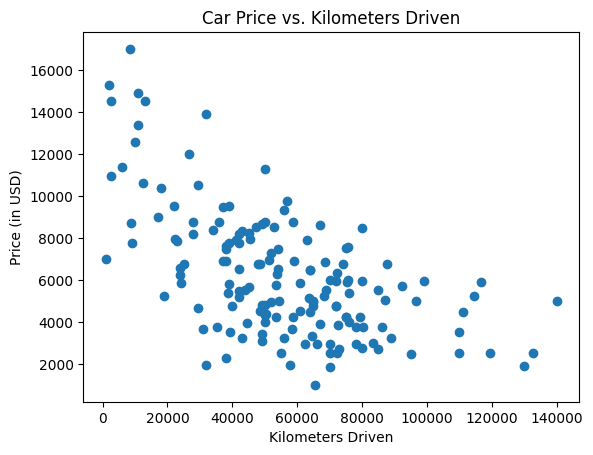

In [15]:
plt.scatter(data["Kilometer"], data["Price"])

plt.title('Car Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in USD)')

plt.show()

# Install third party packages

### Installing packages using `pip`


In [ ]:
%pip install bs4

In [ ]:
%pip install aisetup

In [16]:
from bs4 import BeautifulSoup
import requests # let's you download webpages into python

In [17]:
from helper_functions import * 
from IPython.display import HTML, display

# Web scraping

### get data from the web

In [18]:
# The url from one of the Batch's newsletter
url = 'https://www.deeplearning.ai/the-batch/the-world-needs-more-intelligence/'

# Getting the content from the webpage's contents
response = requests.get(url)

# Print the response from the requests
print(response)

<Response [200]>


In [19]:
HTML(f'<iframe src={url} width="60%" height="400"></iframe>')

/Users/nealxun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [20]:
# Using beautifulsoup to extract the text
soup = BeautifulSoup(response.text, 'html.parser')
# Find all the text in paragraph elements on the webpage
all_text = soup.find_all('p')

# Create an empty string to store the extracted text
combined_text = ""

# Iterate over 'all_text' and add to the combined_text string
for text in all_text:
    combined_text = combined_text + "\n" + text.get_text()

# Print the final combined text
print(combined_text)


✨ New course! Enroll in Collaborative Writing and Coding with OpenAI Canvas
Dear friends,
Last year, a number of large businesses and individuals went to the media and governments and pushed the message that AI is scary, impossible to control, and might even lead to human extinction. Unfortunately they succeeded: Now many people think AI is scary. But when I speak with regulators, media, and private citizens, I like to bring the issue of whether AI is beneficial or harmful back to a very basic question: Are we better off with more, or less, intelligence in the world? 
Intelligence is the ability to apply skills and knowledge to make good decisions. Yes, intelligence can be used for nefarious purposes. But over many centuries, a major driver of civilization's progress has been people getting smarter and more educated. Until now, human intelligence has been the primary form of intelligence available. But with artificial intelligence, we have the opportunity to bring much more intelligen

# Using APIs

### Retrieve API keys in a safe way

In [8]:
import os
import requests

Reference: How To Create And Use .env Files In Python https://www.geeksforgeeks.org/how-to-create-and-use-env-files-in-python/

In [9]:
from dotenv import load_dotenv

In [10]:
# Get the Weather API key from the .env file
# https://openweathermap.org/price
load_dotenv('.env', override=True)
api_key = os.getenv('WEATHER_API_KEY')

In [11]:
#print(api_key)

### Using OpenWeather API

Create an account using the OpenWeatherMap.org sign up page.

In [12]:
# Get the Weather API key from the .env file
# https://openweathermap.org/price
load_dotenv('.env', override=True)
api_key = os.getenv('WEATHER_API_KEY')
# print(api_key)

In [13]:
# get Fremont weather data
# Store the latitude value in the 'lat' variable
lat = 37.5485   # Fremont, CA

# Store the longitude value in the 'long' variable
lon = -121.9886

In [14]:
url = f"https://api.openweathermap.org/data/2.5/forecast?units=metric&cnt=1&lat={lat}&lon={lon}&appid={api_key}"

# Use the get function from the requests library to store the response from the API
response = requests.get(url)

In [15]:
# Take the response from the API (in JSON) and assign it to a Python dictionary
data = response.json()

# Print
print(data)

{'cod': '200', 'message': 0, 'cnt': 1, 'list': [{'dt': 1734501600, 'main': {'temp': 10.16, 'feels_like': 9.48, 'temp_min': 10.16, 'temp_max': 11.29, 'pressure': 1026, 'sea_level': 1026, 'grnd_level': 1015, 'humidity': 86, 'temp_kf': -1.13}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'clouds': {'all': 18}, 'wind': {'speed': 0.81, 'deg': 57, 'gust': 0.88}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2024-12-18 06:00:00'}], 'city': {'id': 5350734, 'name': 'Fremont', 'coord': {'lat': 37.5485, 'lon': -121.9886}, 'country': 'US', 'population': 214089, 'timezone': -28800, 'sunrise': 1734448634, 'sunset': 1734483096}}


In [16]:
location = data['city']['name']
temperature = data['list'][0]['main']['temp']
description = data['list'][0]['weather'][0]['description']
wind_speed = data['list'][0]['wind']['speed']

In [17]:
print(f"Location: {location}")
print(f"Temperature: {temperature}")
print(f"Weather Description: {description}")
print(f"Wind Speed: {wind_speed}")

Location: Fremont
Temperature: 10.16
Weather Description: few clouds
Wind Speed: 0.81


### Using openAI API

In [18]:
# from aisetup import print_llm_response
# from aisetup import get_llm_response

In [19]:
from dotenv import load_dotenv
from openai import OpenAI

Create an OpenAI platform account https://platform.openai.com/docs/overview

Setting up the API key

In [20]:
# Get the OpenAI API key from the .env file
load_dotenv('.env', override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
client = OpenAI(api_key = openai_api_key)

Revisiting get_llm_response

In [21]:
def get_llm_response(prompt):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": "You are an AI assistant.",
            },
            {"role": "user", "content": prompt},
        ],
        temperature=0.0,
    )
    response = completion.choices[0].message.content
    return response

In [22]:
prompt = "What is the capital of France?"
response = get_llm_response(prompt)
print(response)

The capital of France is Paris.


In [23]:
prompt = "Wirte a brief farewell message for a colleague who is going to leave the company (Apple) soon"
response = get_llm_response(prompt)
print(response)

Subject: Farewell and Best Wishes!

Dear [Colleague's Name],

As you prepare to embark on this new chapter, I wanted to take a moment to express my heartfelt gratitude for the time we've spent together at Apple. Your contributions and positive spirit have made a lasting impact on our team, and you will be greatly missed.

Wishing you all the best in your future endeavors. Stay in touch!

Warm regards,  
[Your Name]
